In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import pandas as pd
import requests

In [2]:
#Spotify API credentials from .env
load_dotenv()
client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')
lastfm_api_key = os.getenv('LASTFM_API_KEY')

In [3]:
#spotipy with the credentials
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [4]:
#ID of the playlist I want to extract songs from
#Link to playlist https://open.spotify.com/playlist/37i9dQZF1DX0BcQWzuB7ZO?si=3ad5fc7c76cb4223
playlist_id = '37i9dQZF1DX0BcQWzuB7ZO'

In [5]:
#extract the top songs from a playlist
def get_top_songs_from_playlist(playlist_id):
    #playlist tracks
    results = sp.playlist_tracks(playlist_id)
    #dictionary to store track names and popularity
    top_songs = {}
    
    #extract track popularity
    for item in results['items']:
        track = item['track']
        track_name = track['name']
        popularity = track['popularity']
        
        top_songs[track_name] = popularity
    
    #sort songs by popularity
    sorted_songs = sorted(top_songs.items(), key=lambda x: x[1], reverse=True)
    return sorted_songs

In [6]:
#get the top songs from playlist
top_songs = get_top_songs_from_playlist(playlist_id)

In [7]:
#top songs & popularity
for idx, (song, popularity) in enumerate(top_songs, start=1):
    print(f"{idx}. {song} - Popularity: {popularity}")

1. (It Goes Like) Nanana - Edit - Popularity: 94
2. I'm Good (Blue) - Popularity: 93
3. Baby Don't Hurt Me - Popularity: 92
4. Miracle (with Ellie Goulding) - Popularity: 90
5. Rush - Popularity: 90
6. Desire (with Sam Smith) - Popularity: 87
7. Lay Low - Popularity: 86
8. Push Up - Main Edit - Popularity: 86
9. Substitution (feat. Julian Perretta) - Popularity: 85
10. Give It To Me - Full Vocal Mix - Popularity: 85
11. Rock My Body - Popularity: 84
12. Giving Me - Popularity: 84
13. Padam Padam - Popularity: 83
14. Whistle (feat. Calum Scott) - Popularity: 83
15. Deep Down (feat. Never Dull) - Popularity: 83
16. REACT - Popularity: 82
17. Crying On The Dancefloor - Popularity: 82
18. The Feeling - Popularity: 82
19. Relax My Eyes - Popularity: 82
20. One in a Million - Popularity: 81
21. B.O.T.A. (Baddest Of Them All) - Edit - Popularity: 81
22. Good Love - Popularity: 81
23. Move Your Body - Popularity: 80
24. Ascend - Popularity: 79
25. Weekends - Popularity: 79
26. Eat Your Man (wi

In [8]:
#get genre information using Last.fm API
def get_track_genres(artist_name, track_name):
    lastfm_api_url = f'http://ws.audioscrobbler.com/2.0/?method=track.getInfo&api_key={lastfm_api_key}&artist={artist_name}&track={track_name}&format=json'
    response = requests.get(lastfm_api_url)
    data = response.json()
    
    if 'track' in data and 'toptags' in data['track']:
        tags = data['track']['toptags']['tag']
        genres = [tag['name'] for tag in tags]
        return genres
    else:
        return []

In [9]:
#extract the top songs from playlist and sort by genre
def get_top_songs_sorted_by_genre(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    
    top_songs = []
    
    for item in results['items']:
        track = item['track']
        track_name = track['name']
        artist_name = track['artists'][0]['name']
        popularity = track['popularity']
        
        genres = get_track_genres(artist_name, track_name)
        
        top_songs.append({
            'track_name': track_name,
            'artist_name': artist_name,
            'popularity': popularity,
            'genres': genres
        })
    
    #sort the songs by popularity 
    sorted_songs = sorted(top_songs, key=lambda x: x['popularity'], reverse=True)
    
    return sorted_songs

In [10]:
#top 20 songs from the playlist sorted by genre
top_songs_sorted_by_genre = get_top_songs_sorted_by_genre(playlist_id)[:20]

In [11]:
#top songs and their genres
for idx, song_info in enumerate(top_songs_sorted_by_genre, start=1):
    genres_str = ', '.join(song_info['genres']) if song_info['genres'] else 'Unknown'
    print(f"{idx}. {song_info['track_name']} by {song_info['artist_name']} - Popularity: {song_info['popularity']} - Genres: {genres_str}")

1. (It Goes Like) Nanana - Edit by Peggy Gou - Popularity: 94 - Genres: dance-pop, House, atb, 9PM, MySpotigramBot
2. I'm Good (Blue) by David Guetta - Popularity: 93 - Genres: House, electro house, electronic, dance, dance-pop
3. Baby Don't Hurt Me by David Guetta - Popularity: 92 - Genres: dance, remix
4. Miracle (with Ellie Goulding) by Calvin Harris - Popularity: 90 - Genres: eurodance, trance, dream trance, dance, club
5. Rush by Troye Sivan - Popularity: 90 - Genres: House, pop, party, 2023, electropop
6. Desire (with Sam Smith) by Calvin Harris - Popularity: 87 - Genres: trance, dance, electro house, eurodance, dance pop
7. Lay Low by Tiësto - Popularity: 86 - Genres: metalcore, party, EDM, playlista rmf fm
8. Push Up - Main Edit by Creeds - Popularity: 86 - Genres: dance
9. Substitution (feat. Julian Perretta) by Purple Disco Machine - Popularity: 85 - Genres: Unknown
10. Give It To Me - Full Vocal Mix by Matt Sassari - Popularity: 85 - Genres: Unknown
11. Rock My Body by R3HAB

In [12]:
#count the occurrences of each genre
genre_counts = {}
for song_info in top_songs_sorted_by_genre:
    for genre in song_info['genres']:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

In [13]:
#convert the genre counts dictionary to a DataFrame
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count'])
genre_df.index.name = 'Genre'
genre_df.reset_index(inplace=True)
genre_df.sort_values(by='Count', ascending=False, inplace=True)

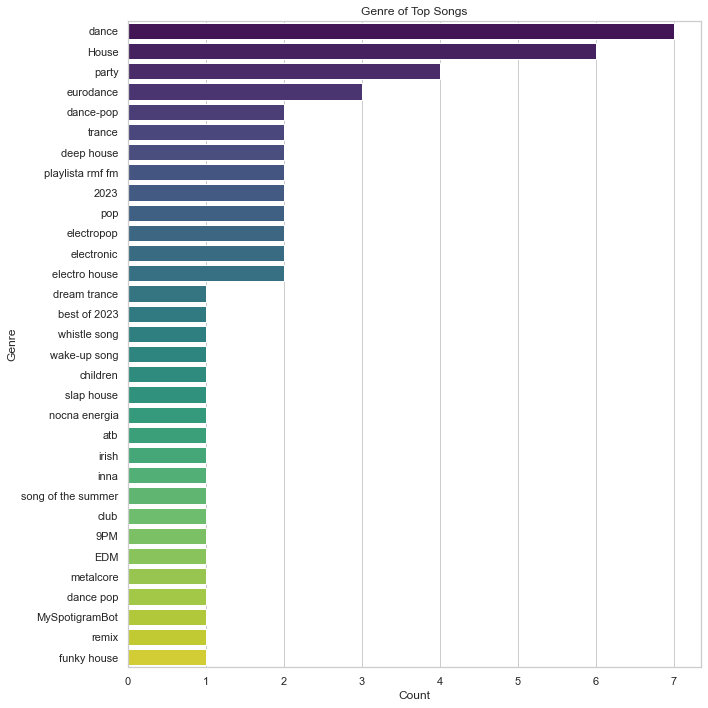

In [14]:
#create a bar chart
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Genre of Top Songs')
plt.tight_layout()
plt.show()

#### The playlist name is called Dance Hits so the genres definitely reflect that, however, Last.fm is not great for labeling genres.